<a href="https://colab.research.google.com/github/anush36/Radiomics-Principle-Component-Analysis/blob/main/Agarwal_Anush_Project_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis**

### Anush Agarwal
### November 1st, 2019




The goal of PCA is to represent data in a lower dimension while retaining as much of the total variance as possible [1]. This is relevant to machine learning because variance along features between examples is essential to differentiate clusters of data. PCA also allows for visualization of high dimensional data sets in a meaningful way as will be shown below.

Scikit-learn contains a built-in PCA algorithm, however it will be shown that equivalent results can be achieved using only numpy functions [2]. For this demonstration, the publicly available UCI ML Breast Cancer Wisconsin (Diagnostic) dataset will be used as it is easily accessible using the sk-learn library [3][4]. This dataset contains 569 examples with 30 features (30 dimensions) that describe the morphology of a cell (radius, texture, symmetry, etc). It is impossible to visualize the data in all 30 dimensions simultaneously, so PCA will be used to visualize the data in the two dimensions that hold the most meaningful information.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# load breast cancer data set as an object and isolate the example dataset, X,
# example labels, Y, and the names of each label, label_names (malignant and benign)
dataset = datasets.load_breast_cancer()
X = dataset.data


## Mean Subtraction Centering

The mean of each feature is subtracted from all examples to center the dataset about the origin. This allows for easier computation in practical applications of PCA.

In [ ]:
# Preprocessing Data
# Centering

Xi, Xj = X.shape
X_standard = np.zeros([Xi,Xj])
means = np.sum(X, axis = 0) / Xi
variances = np.std(X, axis = 0)
for dim in range(Xj):
    X_standard[:, dim] = (X[:, dim] - means[dim])   

## Projection to Principal Subspace

In the textbook, it was shown that the variance of data projected to a dimension is equal to the eigenvalue of the basis vector of that dimension [1]. From this, choosing the eigenvector associated with the largest eigenvalue of the covariance matrix, $S$, would maximize the variance in a one dimensional representation of the data. 

Eigenvalues of covariance matrix:
 [443782.605   7310.1      703.834     54.649     39.89       3.005
      1.815      0.371      0.156      0.084      0.032      0.007
      0.003      0.002      0.001      0.001      0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.   ]

Eigenvalue of each principal component plotted:



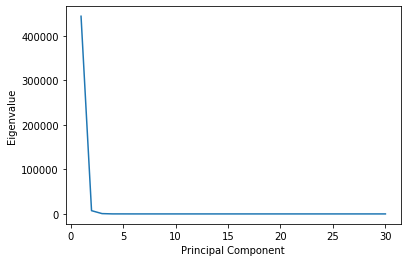

In [ ]:
S_std = np.cov(X_standard.T)
eigvalues_std, eigvectors_std = np.linalg.eig(S_std)  #find eigenvalues and eigenvectors using eigendecomposition
print("Eigenvalues of covariance matrix:\n", eigvalues_std)

print("\nEigenvalue of each principal component plotted:\n")
plt.plot(np.arange(1,Xj + 1,1), eigvalues_std)
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()


The eigenvector associated with the largest eigenvalue is the first principal component of the dataset. All the vectors in $X$ can then be projected onto *pc_1* to find the co-ordinates, $P$, of each example relative to the basis vectors of the principal subspace.

In [ ]:
order = np.argsort(-eigvalues_std) #ordering of eigenvalues is not guarunteed by numpy, this is to double check the order.
    
pc_1 = eigvectors_std[:,order[0]]
print(pc_1)

#project data to first principal component.
P = pc_1.T.dot(X_standard.T)

[ 0.005  0.002  0.035  0.517  0.     0.     0.     0.     0.    -0.
  0.    -0.     0.002  0.056 -0.     0.     0.     0.    -0.    -0.
  0.007  0.003  0.049  0.852  0.     0.     0.     0.     0.     0.   ]


Plotting the projected points to this eigenvector reveals the variation of the data in the first principal component. In the plot below, this variation is represented in the vertical axis. The spread of points in the horizontal axis is artificially created to prevent points from overlapping in the visualization.

Data Visualization with 1 Principal Component: 



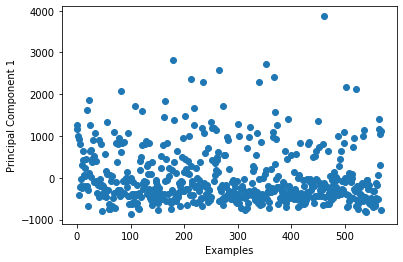

In [ ]:
toPlot = np.arange(0,Xi,1)

print("Data Visualization with 1 Principal Component:", "\n")
plt.scatter(toPlot,P)
plt.xlabel("Examples")
plt.ylabel("Principal Component 1")
plt.show()

By including the label data, it can be seen in the figure below that both classes, malignant and benign, are well separated with just one principal component. The domination of malignant labels in outlying points agrees with the concept that cancerous cells are misshapen, and are therefore less likely to conform to the mean value of a morphological feature [5]. 




Data Visualization with 1 Principal Component and sample labels: 



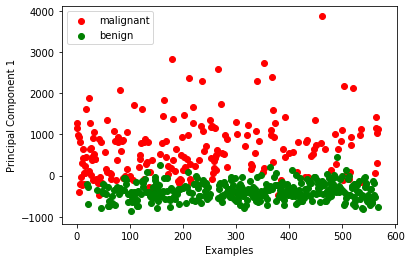

In [ ]:
Y = dataset.target
label_names = dataset.target_names

ben = P[Y[:] > 0.5]
ben_toPlot = toPlot[Y[:] > 0.5]
mal = P[Y[:] < 0.5]
mal_toPlot = toPlot[Y[:] < 0.5]

print("Data Visualization with 1 Principal Component and sample labels:", "\n")
plt.scatter(mal_toPlot,mal, color = 'red')
plt.scatter(ben_toPlot,ben, color = 'green')
plt.xlabel("Examples")
plt.ylabel("Principal Component 1")
plt.legend(label_names)
plt.show()


This process can be extended to obtain projections of the data onto a principal subspace that has a dimensionality, $m$. To generalize the projection, a projection matrix, $B_m$, can be created whose columns are the basis eigenvectors, $b$, of the covariance of the centered data, $S$. 



$$B_m=[b_1, ... , b_m]$$ 

For an $m$ dimensional principal subspace, the projected data, $P$, can be found:

Data Visualization with 2 Principal Components: 



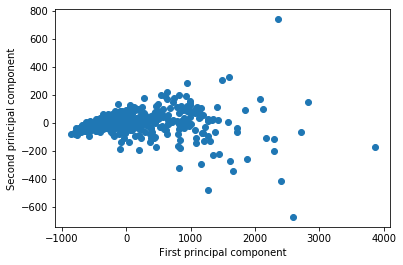

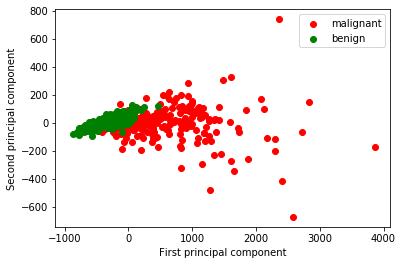

In [ ]:
m = 2   

B = eigvectors_std[:, order[0 : m]]

P = B.T.dot(X_standard.T)

if m == 2:  #error proofing if user changes value of m above.
  print("Data Visualization with 2 Principal Components:", "\n")

  plt.scatter(P[0,:],P[1,:])
  plt.xlabel("First principal component")
  plt.ylabel("Second principal component")
  plt.show()
  
  # View 2-component PCA with classes
  plt.scatter(P[0,Y[:] < 0.5],P[1,Y[:] < 0.5], color = 'red')
  plt.scatter(P[0,Y[:] > 0.5],P[1,Y[:] > 0.5], color = 'green')
  plt.xlabel("First principal component")
  plt.ylabel("Second principal component")
  plt.legend(label_names)
  plt.show()





# Maximum Variance Perspective

PCA can be viewed as an algorithm that finds the maximum variance representation in a lower dimensional subspace. The maximum variance that can be captured by an $M$ dimensional subspace is given by:

$$V_M=\sum_{i=1}^{M}\lambda_i$$

The variance lost is given by:

$$J_M=\sum_{i=M+1}^{D}\lambda_i$$

In [ ]:
# Find the variance of each principal component as a percentage of total variance.
var_ofTotal = eigvalues_std / np.sum(eigvalues_std) * 100

V = 0
J = 0

for dim in range(m):
  V += var_ofTotal[dim]

for dim in np.arange(m+1,Xj,1):
  J += var_ofTotal[dim]

print(f"Percentage of total variance captured with {m} principal components: {V}%.")
print(f"Percentage of total variance lost with {m} principal components: {J}%.")

Percentage of total variance captured with 2 principal components: 99.82211613741725%.
Percentage of total variance lost with 2 principal components: 0.02213278808123024%.


## Projection Perspective

Another way to interpret PCA is as an algorithm that minimizes the average reconstruction error. Intuitively, minimizing the reconstruction error of a lower dimensional representation is equivalent to maximizing its variance. As the uncaptured variance reduces, the euclidean distance between a transformed point and the original point will also reduce.

The matrix of projected vectors, $P$, found earlier gave co-ordinates in terms of the basis vectors of the principal subspace. To find the representation of these projections in terms of the original dimensionality, they must be multiplied by the projection matrix, $B$. The reconstruction error for an $M$ dimensional reconstruction, $R_M$, can then be measured as the average squared Euclidean distance between the projected vectors and the original vectors:

$$R_M=\frac{1}{N} \sum_{n=1}^{N}\| x_n-\tilde x_n\|^2$$



In [ ]:
X_proj = B.dot(P) #transform projected points back to original dimensionality.

X_dif = X - X_proj.T  #difference vector
R = 0

for example in range(Xi):
  R += np.linalg.norm(X_dif[example, :]) ** 2

R = R / Xi

print(f"Average reconstruction error with a projection to {m} Principal component subspace: {R}")




Average reconstruction error with a projection to 2 Principal component subspace: 1228205.0395900148


## Singular Value Decomposition

Another method for finding the eigenvalues is using singular value decomposition. The SVD of the data matrix is given by:

$$X = U\Sigma V^T $$

The singular values found in $\Sigma$ (E matrix in the code) are related to the eigenvalues, $\lambda $, by:

$$ \lambda_d = \frac{\sigma_d^2}{N}$$

Additionally, the columns of $U$ are equivalent to the eigenvectors. Through this relationship, with the same eigenvalues and eigenvectors as above, the best lower dimensional representation of the data can also be retrieved. 


In [ ]:
U, E, V = np.linalg.svd(X_standard.T)

#relationship between eigenvalues and singular values:
svd_eig = (E ** 2) / Xi

print("Singular values squared and divided by N are effectively equivalent to the eigenvalues:\n")
print(svd_eig)
print(eigvalues_std)

#relationship between eigenvectors and columns of U matrix:
print("\n","The first column of U is equivalent to the first eigenvector multiplied by a scalar of -1:\n")
print(U[:,0])
print(eigvectors_std[:,0])


Singular values squared and divided by N are effectively equivalent to the eigenvalues:

[443002.671   7297.253    702.597     54.553     39.82       2.999
      1.812      0.371      0.155      0.084      0.032      0.007
      0.003      0.002      0.001      0.001      0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.   ]
[443782.605   7310.1      703.834     54.649     39.89       3.005
      1.815      0.371      0.156      0.084      0.032      0.007
      0.003      0.002      0.001      0.001      0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.   ]

 The first column of U is equivalent to the first eigenvector multiplied by a scalar of -1:

[-0.005 -0.002 -0.035 -0.517 -0.    -0.    -0.    -0.    -0.     0.
 -0.     0.    -0.002 -0.056  0.    -0.    -0.    -0.     0.     0.
 -0.007 -0.003 -0.049

## First Eigenvector using Power Iteration

A practical trick to find the first eigenvector is to use power iteration shown below. This involves multiplying $x_k$, a random vector in the null space of the covariance matrix, $S$, and then normalizing it. This process is repeated $k$ times until it converges: 

$$x_{k+1} =  \frac{Sx_k}{\|Sx_k\|}$$

In [ ]:
# Randomly choose each component of the vector from an example in the dataset. This ensures that the vector is not in the null space of S.
x_rand = np.zeros(30)

for dim in range(Xj):
  sample = round(np.random.rand() * Xi)
  x_rand[dim] = X_standard[sample, dim]

x_new = np.zeros(30)
x_new = (S_std.dot(x_rand)) / np.linalg.norm(S_std.dot(x_rand))

while(np.allclose(x_new, x_rand, 0.0001, 0.0001) == False):
  x_rand = x_new
  x_new = (S_std.dot(x_new)) / np.linalg.norm(S_std.dot(x_new))

print("The converged vector is equivalent to the first eigenvector (multiplied by a scalar depending on initialization):\n")
print(x_rand)
print(eigvectors_std[:,0])


The converged vector is equivalent to the first eigenvector (multiplied by a scalar depending on initialization):

[-0.005 -0.002 -0.035 -0.517 -0.    -0.    -0.    -0.    -0.     0.
 -0.     0.    -0.002 -0.056  0.    -0.    -0.    -0.     0.     0.
 -0.007 -0.003 -0.049 -0.852 -0.    -0.    -0.    -0.    -0.    -0.   ]
[ 0.005  0.002  0.035  0.517  0.     0.     0.     0.     0.    -0.
  0.    -0.     0.002  0.056 -0.     0.     0.     0.    -0.    -0.
  0.007  0.003  0.049  0.852  0.     0.     0.     0.     0.     0.   ]


## PCA with Large Dimensions

The dataset used in this demonstration has a dimensionality of 30, making it computationally simple to solve for all eigenvalues using eigendecomposition or SVD. This may not always be feasible for high dimensional datasets. The textbook mentioned a particular case where the number of examples is significantly less than the number of dimensions. In this case, some of the dimensions are redundant and so calculating the eigenvectors of the entire $D\times D$ covariance matrix would be a computational waste [1]. 

This scenario can be simulated by considering all features of the first 3 examples of the Wisconsin breast cancer dataset such that the dataset is 3x30. In the calculation below, it is shown that the first eigenvector of the 30x30 covariance matrix, $XX^T \epsilon \space{\displaystyle \mathbb {R} }^{D\times D}$, can be found from the first eigenvector of the 3x3 covariance matrix: $X^TX \epsilon \space{\displaystyle \mathbb {R} }^{N\times N}$. This process can be repeated for the remaining eigenvectors of $X^TX$, and can be scaled to problems with higher dimensionality. It enables the determination of the PCA basis vectors without computationally prohibitive operations on a large covariance matrix.

In [ ]:
X_ld = X_standard[0:3, :].T

print("First eigenvector from D x D covariance matrix:\n")
cov_X_ld = X_ld.dot(X_ld.T)
print("Shape of covariance matrix:", cov_X_ld.shape)
eival, eivec = np.linalg.eig(cov_X_ld)
print(abs(eivec[:,0]))

print("\nFirst eigenvector found from N x N covariance matrix:\n")
cov_X_ld_T = X_ld.T.dot(X_ld)
print("Shape of covariance matrix:", cov_X_ld_T.shape)
eival, eivec = np.linalg.eig(cov_X_ld_T)
eivec_1 = eivec[:,0]
recalc = (X_ld).dot(eivec_1)
print(recalc / np.linalg.norm(recalc)) #normalize the transformed eigenvector.

First eigenvector from D x D covariance matrix:

Shape of covariance matrix: (30, 30)
[0.005 0.003 0.032 0.453 0.    0.    0.    0.    0.    0.    0.    0.
 0.002 0.058 0.    0.    0.    0.    0.    0.    0.007 0.003 0.051 0.887
 0.    0.    0.    0.    0.    0.   ]

First eigenvector found from N x N covariance matrix:

Shape of covariance matrix: (3, 3)
[ 0.005 -0.003  0.032  0.453  0.     0.     0.     0.     0.     0.
  0.    -0.     0.002  0.058 -0.     0.     0.     0.     0.     0.
  0.007 -0.003  0.051  0.887  0.     0.     0.     0.     0.     0.   ]


## Using scikit-learn Libraries

It is also possible to use the PCA model developed by the sklearn library to transform the data to a principal subspace, similar to what was carried out manually earlier in this demonstration. 

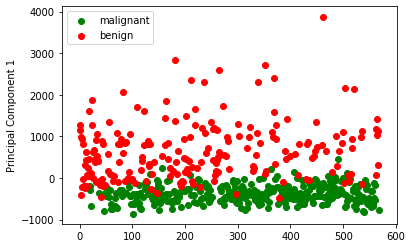


The average log-likelyhood of all samples is: -130.73698263705592


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)

X_pca = pca.transform(X)

#set up plots
toPlot = np.arange(0,Xi,1)
ben = X_pca[Y[:] > 0.5]
ben_toPlot = toPlot[Y[:] > 0.5]
mal = X_pca[Y[:] < 0.5]
mal_toPlot = toPlot[Y[:] < 0.5]

plt.scatter(ben_toPlot,ben, color = 'green')
plt.scatter(mal_toPlot,mal, color = 'red')
plt.ylabel("Principal Component 1")
plt.legend(label_names)
plt.show()

scores = pca.score(X)

print("\nThe average log-likelyhood of all samples is:",scores)



## Latent Variable Perspective

Another approach to PCA is to consider it as a maximum likelihood estimation (MLE) where any given example is a function of a latent variable, $z_m$, the offset between the centered data and the non centered example, $\mu$, a projection matrix, $B$, and some noise, $\sigma$ [1].  By using Bayesian inference an MLE model can determine the appropriate number of dimensions to use in the principal subspace and create a probabilistic model [6]. The log-likely hood of each example can also be computed for the created model. This would allow for comparison with other probabilistic models. It can also be seen that the samples are better fit by the model created using MLE than with the model created with just one principal component above. This is based on the average log-likelyhood being lower for the model with one principal component.

In [ ]:
p_pca = PCA(svd_solver='full', n_components='mle')
p_pca.fit(X_standard)
cov_sklearn = p_pca.get_covariance()
scores = p_pca.score(X_standard)

print("The average log-likelyhood of all samples is:", scores)
print("\n", cov_sklearn[0, :])
print(S_std[0, :])

The average log-likelyhood of all samples is: 32.512920830962514

 [  12.419    4.908   85.447 1224.483    0.008    0.094    0.19     0.112
    0.014   -0.008    0.664   -0.189    4.804  117.968   -0.002    0.013
    0.021    0.008   -0.003   -0.      16.514    6.433  114.289 1888.227
    0.01     0.229    0.387    0.172    0.036    0.   ]
[  12.419    4.908   85.447 1224.483    0.008    0.094    0.19     0.112
    0.014   -0.008    0.664   -0.189    4.804  117.968   -0.002    0.013
    0.021    0.008   -0.003   -0.      16.514    6.433  114.289 1888.227
    0.01     0.229    0.387    0.172    0.036    0.   ]


## References


1.   M. P. Deisenroth, A. A. Faisal, and C. S. Ong, Mathematics for Machine Learning. To be published by: Cambridge University Press, 2019.
2.   "sklearn.decomposition.PCA," 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html. [Accessed: 01-Nov-2019].
3.    “sklearn.datasets.load_breast_cancer,” 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html. [Accessed: 01-Nov-2019].
4.    D. Dua and C. Graff, “UCI Machine Learning Repository,” 2019. [Online]. Available: http://archive.ics.uci.edu/ml. [Accessed: 01-Nov-2019].
5. A. I. Baba and C. Câtoi, Comparative Oncology: Chapter 3, Tumor Cell Morphology. Bucharest, RO: The Publishing House of the Romanian Academy, 2007.
6. T.P. Minka, Automatic choice of dimensionality for PCA. MIT Media Laboratory Perceptual Computing Section Technical Report No. 514, MIT Media Laboratory Vision and Modeling Group, 2000.





